In [19]:
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_bike_nyc_data(file_path):
    with h5py.File(file_path, 'r') as f:
        date = f['date'][:]
        data = f['data'][:]
    return date, data

# Plot heatmaps for inflow and outflow
def plot_raw_data_multi_nodes(data, begin_time, end_time, title):
    num_timeslots = end_time - begin_time
    num_cols = 2
    figsize = (num_cols * 5, num_timeslots * 3)
    fig, axs = plt.subplots(num_timeslots, num_cols, figsize=figsize)
    fig.suptitle(title, fontsize=16)

    for i, ts in enumerate(range(begin_time, end_time)):
        inflow = data[ts][0]
        outflow = data[ts][1]

        ax_in = axs[i, 0] if num_timeslots > 1 else axs[0]
        ax_out = axs[i, 1] if num_timeslots > 1 else axs[1]

        # cmap: coolwarm
        sns.heatmap(inflow.transpose(), ax=ax_in, cmap='RdYlGn_r', cbar=True, square=True)
        sns.heatmap(outflow.transpose(), ax=ax_out, cmap='RdYlGn_r', cbar=True, square=True)
        
        ax_in.set_title(f'Hour {ts%24}: Inflow')
        ax_out.set_title(f'Hour {ts%24}: Outflow')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

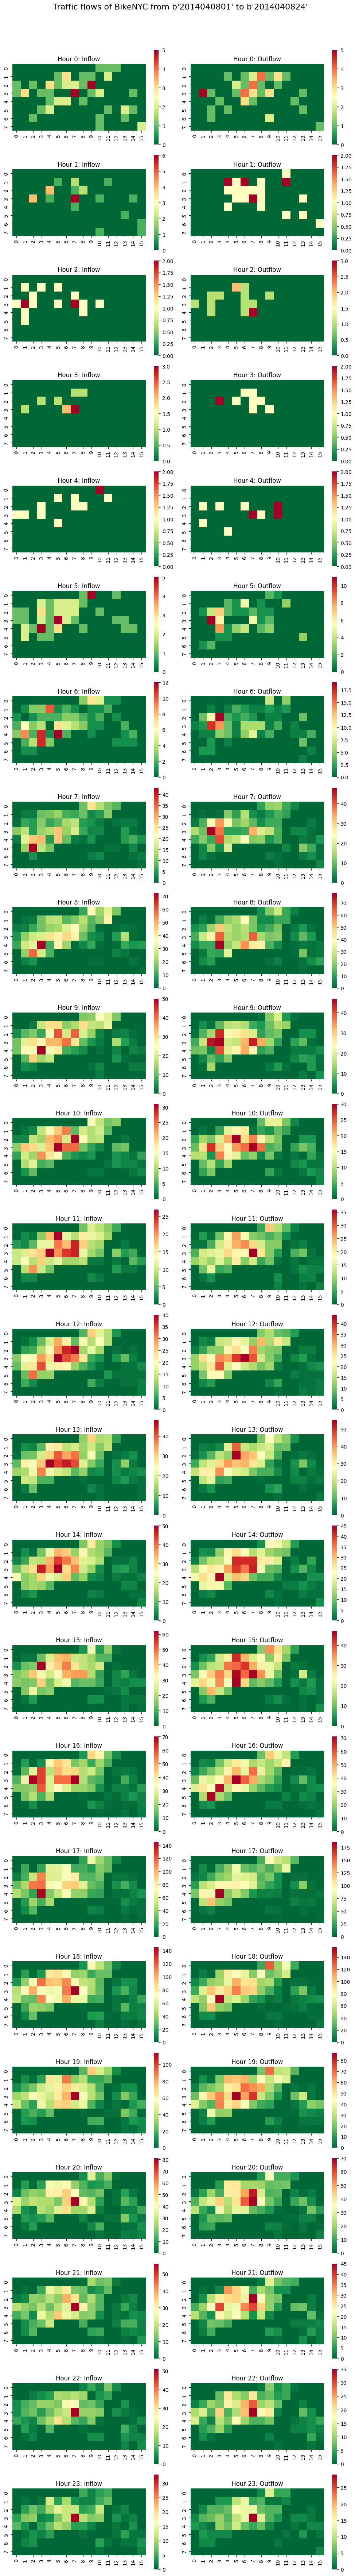

In [20]:
# NYCBike1 60min
file_path = 'NYCBike1/NYC14_M16x8_T60_NewEnd.h5'
date, data = load_bike_nyc_data(file_path)


DAY_START = 7
DAY_SPAN = 1
title = f"Traffic flows of BikeNYC from {date[24*DAY_START]} to {date[24*(DAY_START + DAY_SPAN)-1]}"
plot_raw_data_multi_nodes(
    data=data,
    begin_time=24 * DAY_START,
    end_time=24 * (DAY_START + DAY_SPAN),
    title=title
)
